# Introduction
Elliptical envelope is a technique for detecting outliers in multi-dimensional data, assuming it follows a Gaussian distribution. It essentially draws an ellipse around the "normal" data points and identifies anything falling outside this boundary as an anamoly.

### Intuition behind elliptical envelope
- Imagine a dataset with multiple features (dimensions). Elliptical envelope assumes that the combined distribution of these features forms a multi-dimensional Gaussian, which visually resembles an ellipse.
- This ellipse represents the "expected" or "normal" behavior of the data. Points clustered within or close to the ellipse are considered typical.

# Elliptical Envelope Algorithm

### Core idea
1. Distribution fitting: This technique starts by fitting a Gaussian distribution (multivariate Gaussian for multiple features) to the data. This involves estimating the key parameters of the distribution,
    - $\mu$ (mean): The cenre of the ellipse representing the average values for each feature.
    - $\Sigma$ (covariance matrix): Captures the relationship between the features, influencing the shape and orientation of the ellipse.
2. Estimating $\mu$ and $\Sigma$: These parameters are not directly known, they are estimated from the actual data points. This estimation process involves complex calculations but aims to find the best-fitting ellipse that captures the central tendency and variation within the data.

### Algorithm
1. Calculate the mean and covariance matrix:
    - The mean vector represents the centre of the ellipse.
    - The covariance matrix represents the shape and orientation of the ellipse.
2. Determine the Mahalonobis distance: The Mahalonobis distance for each data point from the mean vector is calculated. This distance takes into account the covariance structure of the data.
3. Set a threshold: A threshold value is chosen for the Mahalonobis distance. Points with a distance greater than this threshold are considered as outliers.
4. Identify outliers: Compare the Mahalonobis distance of each point to the threshold. If the distance is greater than the threshold, the data point is classified as an outlier.

The Mahalonobis distance is mathematically represented as,

$d(x_i, \mu) = \sqrt{(x_i - \mu)^T \Sigma^{-1} (x_i - \mu)}$

Where,
- $x_i$ = A vector representing a data point.
- $\mu$ = The mean vector of the distribution.
- $\Sigma$ = The covariance matrix of the distribution.

# Implementation of Elliptical Envelope

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# importing the dataset
df = pd.read_csv("AnomalyDetection.csv")
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mileage,908.0,45.869736,30.598219,1.398964,25.415487,34.599453,49.862529,128.604249
Price,908.0,77.555036,19.275677,20.000000,64.435773,73.550501,88.939217,141.201890


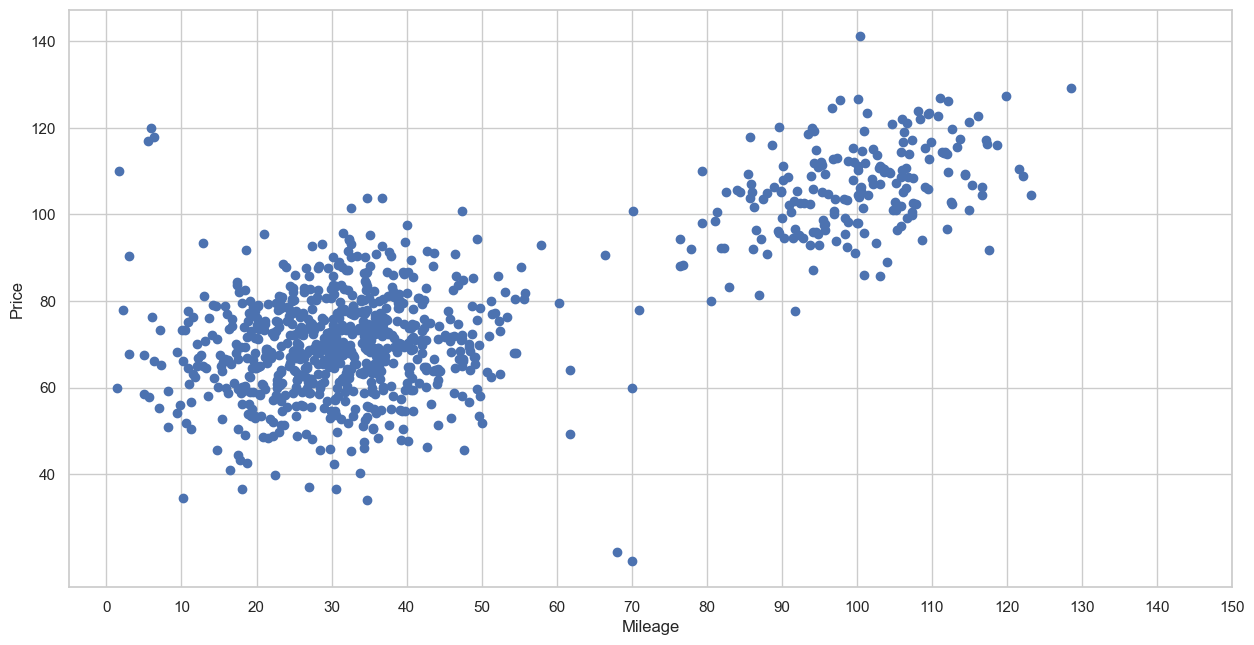

In [5]:
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Mileage"], df["Price"])
plt.yticks(np.arange(40, 160, 20))
plt.xticks(np.arange(0, 160, 10))
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [6]:
# model building and detection
from sklearn.covariance import EllipticEnvelope

model = EllipticEnvelope()
# model = EllipticEnvelope(random_state = 0, contamination = 0.1)
model.fit(df)

EllipticEnvelope()

In [7]:
prediction = model.predict(df)
prediction

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [8]:
df["outlier"] = prediction
df.head()

,Mileage,Price,outlier
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


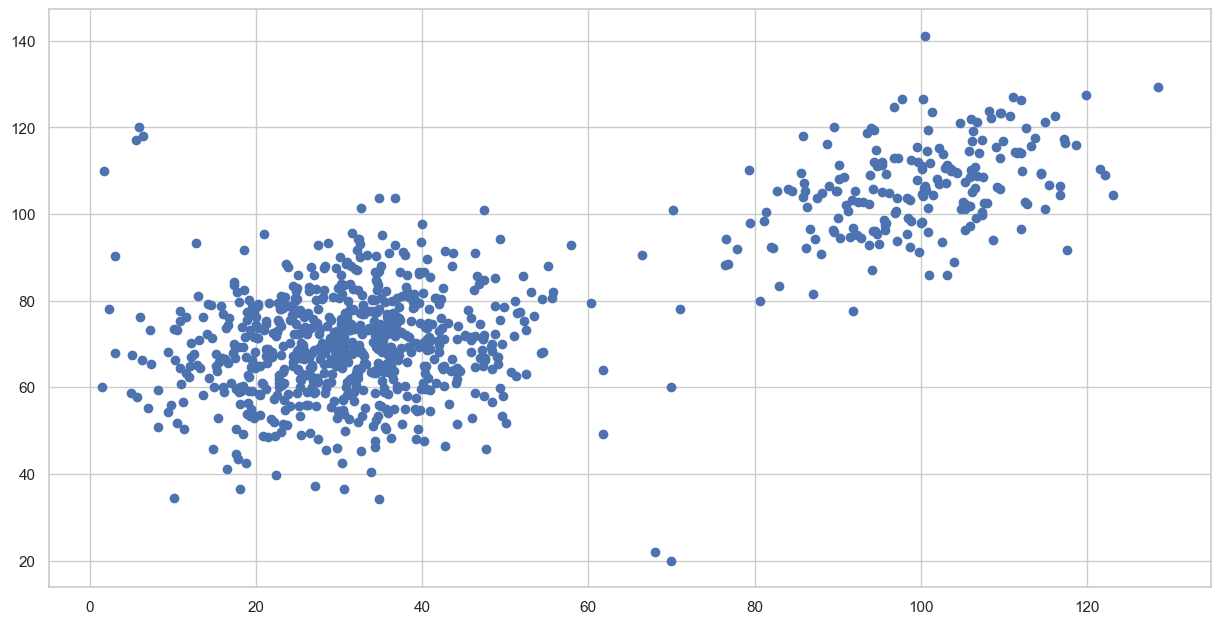

In [9]:
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Mileage"], df["Price"])
plt.show()

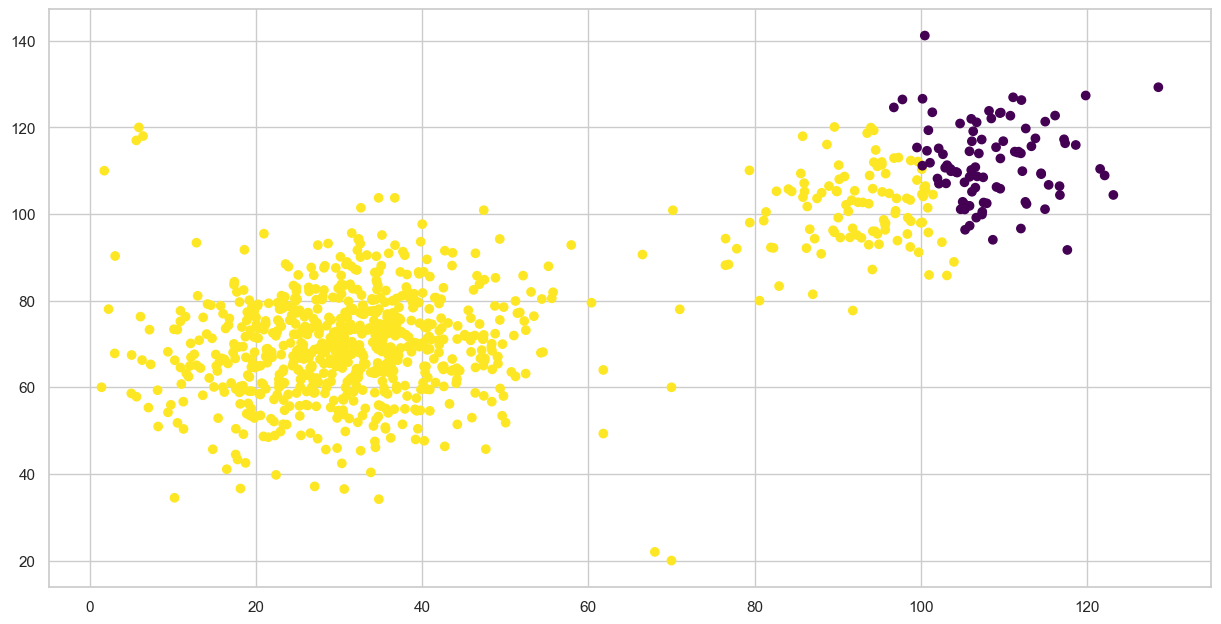

In [10]:
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Mileage"], df["Price"], c = df["outlier"], cmap = "viridis")
plt.show()

# Threshold and Outlier Detection
Once the ellipse (Gaussian distribution) is fit, new data points can be evaluated. For each new data point,
- Its distance from the centre ($\mu$) is measured in terms of standard deviations - this is called z-score.
- A threshold is defined (usually based on domain knowledge or desired sensitivity). Points with Z-scores exceeding the threshold in either direction are flagged as outliers.

### How to choose a threshold?
The threshold for outlier detection is crucial. It determines how strictly the "normal" behavior should be defined. Business sense plays a critical role here,
- High threshold (Strict): A high threshold (few standard deviations away) means fewer points are flagged as outliers. This ight be suitable for settings requiring high precision and minimal false positives.
- Low thershold (Loose): A low threshold (more standard deviations away) might capture more outliers, potentially including some valid data points. This could be appropriate for situations where catching most anomalies is a priority, even at the risk of some false positives.

# Applications of Elliptical Envelope
Elliptical Envelope finds applications in various fields,
- Fraud Detection: Identifying unusual transactions that deviate from typical spending patterns.
- Network Intrusion Detection: Spotting suspicious network traffic patterns that might indicate a security threat.
- Anomaly Detection in Sensor Data: Detecting sudden changes in sensor readings that could signal equipment malfunction.

# Limitations of Elliptical Envelope
- Elliptical envelope assumes Gaussian distribution, which might not always be the perfect fit for real-world data.
- It might struggle with complex data patterns or highly skewed distributions.

# Time and Space Complexity of Elliptical Envelope

### Time complexity
The worst cast time complexity of elliptical envelope is,

$O(n^3)$

Where,
- n = number of data points.

### Space complexity
The space complexity of elliptical envelope is,

$O(n^2)$

Where,
- n = number of data points.


# RANSAC
Random Sample Consensus (RANSAC) is a powerful tool used in ML to estimate model parameters when there is a lot of noise in the data.

### How does RANSAC work?
1. Random Sampling: RANSAC works iteratively. In each iteration, it randomly selects a small subset of data points (n1 < total data points).
2. Model Fitting on the Subset: This small, hopefully outlier-free, subset is used to estimate the model parameters (μ and σ for a Gaussian distribution).
3. Finding Inliers: The estimated model is then applied to the entire dataset. Points that "fit well" with the model (within a certain threshold) are considered inliers, representing the true underlying pattern.
4. Refining the Model (Optional): Based on the inliers, the model parameters can be further refined (e.g., averaging the parameters from successful iterations).

The entire process is repeated multiple times. By repeating, RANSAC increases the chance of selecting a good subset of points that leads to a robust model even with a large number of outliers.

In some cases, transforming non-Gaussian data into a Gaussian (using log-normal transformation) might be helpful for RANSAC. However, this is not always necessary.